# Análise exploratória e descritiva -  Vagas coletadas gupy
## Marco Antonio Guibor | 30 ago 23

Em primeiro lugar, vamos importar as bibliotecas pandas e matplotlib, e os dados a serem analisados. O objetivo é desenvolver *insights* a partir desses dados e compreender características das vagas abertas na gupy, utilizando os dados coletados pelo *scraping*.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dados = pd.read_csv("data.csv")
dados.head()

,Empresa,Vaga,Modelo,Tipo,Cidade,UF,Dia_Publicação,Mes_Publicação,Ano_Publicação,Possui p/ PCD?,Link
0,Geopixel,Estágio - Itatiba/ SP,Presencial,Estágio,Itatiba,SP,30,8,2023,Não,['https://geopixel.gupy.io/job/eyJqb2JJZCI6NTM...
1,Arcor do Brasil - Conectando Pessoas a Oportun...,Estágio em Pesquisa e Desenvolvimento,Presencial,Estágio,Bragança P...,SP,30,8,2023,Sim,['https://arcor.gupy.io/job/eyJqb2JJZCI6NTM2MD...
2,Cielo,Estágio em Arquitetura Corporativa,Presencial,Estágio,Barueri,SP,30,8,2023,Sim,['https://cielo.gupy.io/job/eyJqb2JJZCI6NTM1OT...
3,AESC - Associação Educadora São Carlos,Estágio Enfermeiro Centro Cirúrgico Unidade Ca...,Presencial,Estágio,Porto Alegre,RS,30,8,2023,Não,['https://somosaesc.gupy.io/job/eyJqb2JJZCI6NT...
4,Oliveira & Antunes,Estágio Jurídico - Blumenau/SC,Presencial,Estágio,Blumenau,SC,30,8,2023,Sim,['https://oliveiraeantunesadvogados.gupy.io/jo...


--------------------------------------------------------------------------------
Aqui, criei uma função que calcula as proporções de cada variável, para que possamos realizar análise específica de percentual de valores que cada variável pode assumir. Por exemplo, calcular o percentual de vagas de estágio no Paraná ou a proporção de vagas por modalidade por estado.

In [96]:
#Calcula as proporções de cada valor por variável
def calc_prop(i):
    valores = dados[i].value_counts()
    proporcoes = valores/valores.sum()
    return(proporcoes)

In [45]:
prop_modelo = calc_prop('Modelo')
prop_tipo = calc_prop('Tipo')
prop_uf = calc_prop('UF')
prop_pcd = calc_prop('Possui p/ PCD?')
prop_tipo = calc_prop('Tipo')

Estágio              0.791585
Efetivo              0.121510
Banco de Talentos    0.082973
Aprendiz             0.001966
Pessoa Jurídica      0.001180
Terceiro             0.000393
Associado            0.000393
Name: Tipo, dtype: float64

In [ ]:
# Checa o número de vagas por UF, incluindo as não informadas localização
dados['UF'].value_counts(dropna = False)

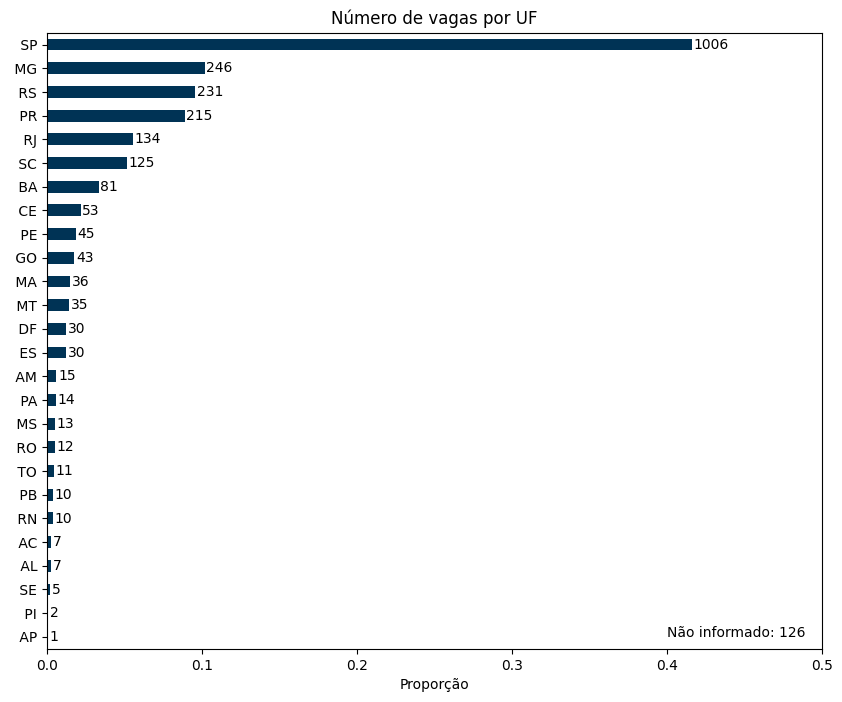

In [90]:
plt.figure(figsize=(10, 8))
grafico_uf = prop_uf.plot(kind='barh', color = "#003355")
uf_valor = dados['UF'].value_counts()
plt.gca().invert_yaxis()
plt.xlim(0, 0.5)
plt.title('Número de vagas por UF')
for index, value in enumerate(uf_valor):
    grafico_uf.text(prop_uf[index] + 0.001, index, str(value), va='center', color='black')
grafico_uf.text(0.4, 25, 'Não informado: 126')
plt.xlabel('Proporção')
plt.savefig('n_vagas_por_uf.jpeg')

In [91]:
# Número de vagas por UF, incluindo estados não especificados.
uf_valor_na = uf_valor = dados['UF'].value_counts(dropna = False)
uf_valor_na

 SP    1006
 MG     246
 RS     231
 PR     215
 RJ     134
NaN     126
 SC     125
 BA      81
 CE      53
 PE      45
 GO      43
 MA      36
 MT      35
 DF      30
 ES      30
 AM      15
 PA      14
 MS      13
 RO      12
 TO      11
 RN      10
 PB      10
 AL       7
 AC       7
 SE       5
 PI       2
 AP       1
Name: UF, dtype: int64

Aqui crio uma visualização para o número de vagas abertas por estado, com um gráfico de barras horizontais, inserindo ao lado de cada barra o valor total de vagas.  

* **A maior parte das vagas ficam no estado de São Paulo**
* **Alguns estados têm pouquíssimas vagas, como Amapá e Piauí**

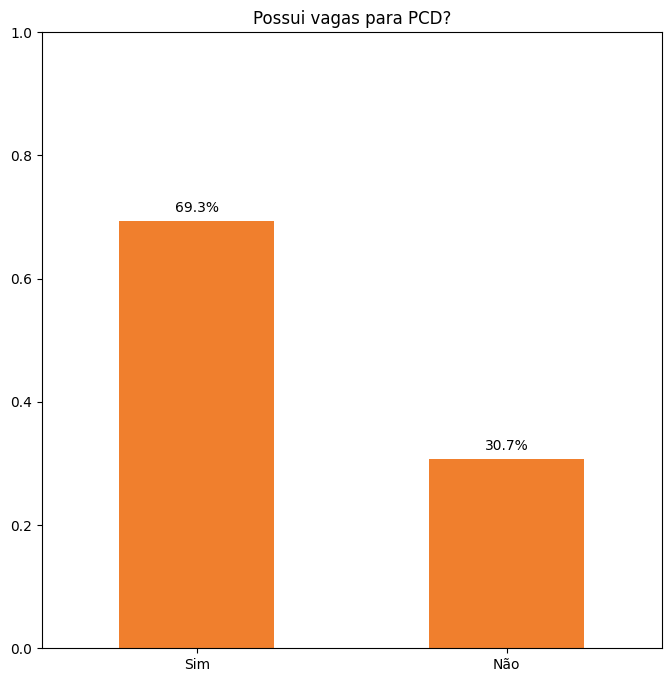

In [63]:
plt.figure(figsize=(8, 8))
grafico = prop_pcd.plot(kind='bar', color = '#F07F2D')

for bar in grafico.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.1%}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.title("Possui vagas para PCD?")
dados['Possui p/ PCD?'].value_counts()
plt.savefig('vagas_pcd.jpeg')

A próxima visualização se refere a proporção de vagas para PCD. Entre as mais de 2500 vagas analisadas, 780 não explicitaram se tinham vagas para pessoas com deficiência, representando 30,7% do total.

* **A maior parte (69,3%) das vagas analisadas têm vaga para pessoas com deficiência**
* **No entanto, 780 vagas não explicitaram ou não possuem vaga para pessoa com deficiência**

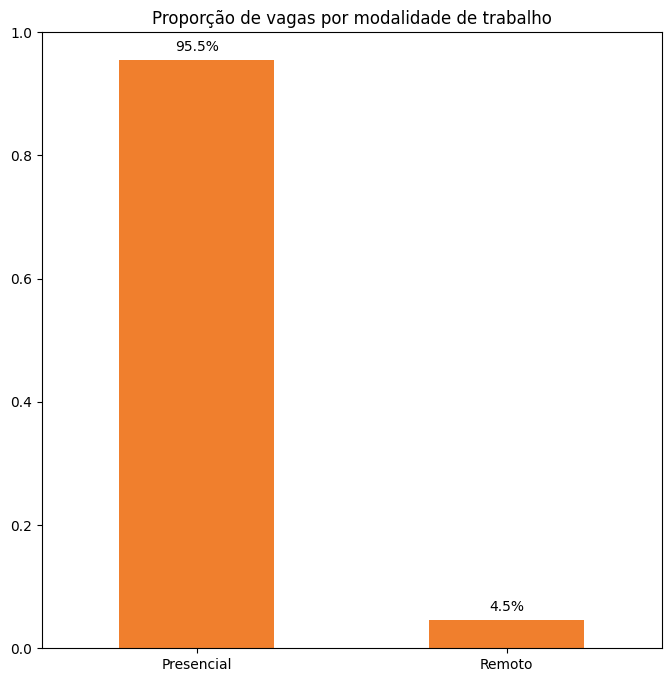

In [97]:
plt.figure(figsize=(8, 8))
grafico = prop_modelo.plot(kind='bar', color = '#F07F2D')

for bar in grafico.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.1%}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.title("Proporção de vagas por modalidade de trabalho")
plt.savefig('prop_vagas_modalidade.jpeg')

Entre as vagas, **95,5% declaravam ser presencial e apenas 4,5% remoto**.  

Isso se deve a vagas híbridas que colocam em suas descrições que são presenciais, com finalidade de atrair majoritariamente candidatos que morem na cidade da vaga.

<Figure size 1500x800 with 0 Axes>

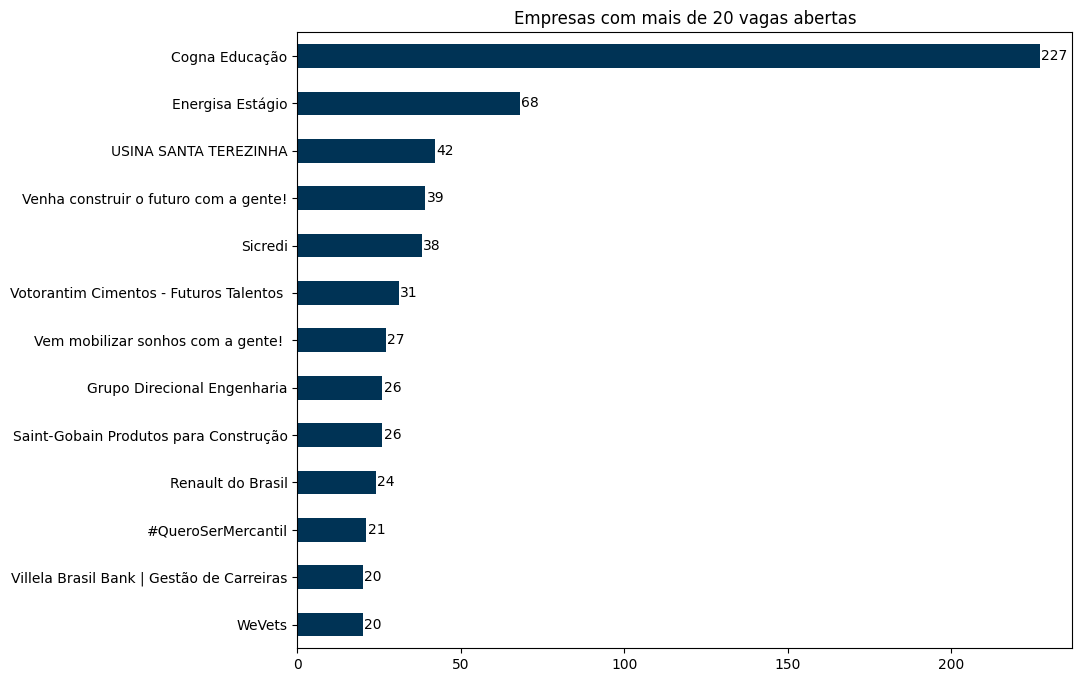

In [98]:
plt.figure(figsize=(15, 8))
empresas_contagem = dados["Empresa"].value_counts()
empresas_mais_20 = empresas_contagem[empresas_contagem >= 20]
plt.figure(figsize=(10, 8))
grafico_e20 = empresas_mais_20.plot(kind='barh', color = "#003355")
plt.gca().invert_yaxis()
plt.xlim(0, max(empresas_mais_20)  + 10)
plt.title('Empresas com mais de 20 vagas abertas')
for i, valor in enumerate(empresas_mais_20.values):
    grafico_e20.text(valor + 0.5, i, str(valor), va='center', color='black')
plt.savefig('empresas_mais_20_vagas.jpeg')

--------------------------------------------------------------------------------
O próximo gráfico tem objetivo de apresentar empresar com um número relevante de vagas. Nesse caso, tratei 20 ou mais como parâmetro.  **"Cogna Educação" ficou a frente, com mais de 220 vagas em aberto.**

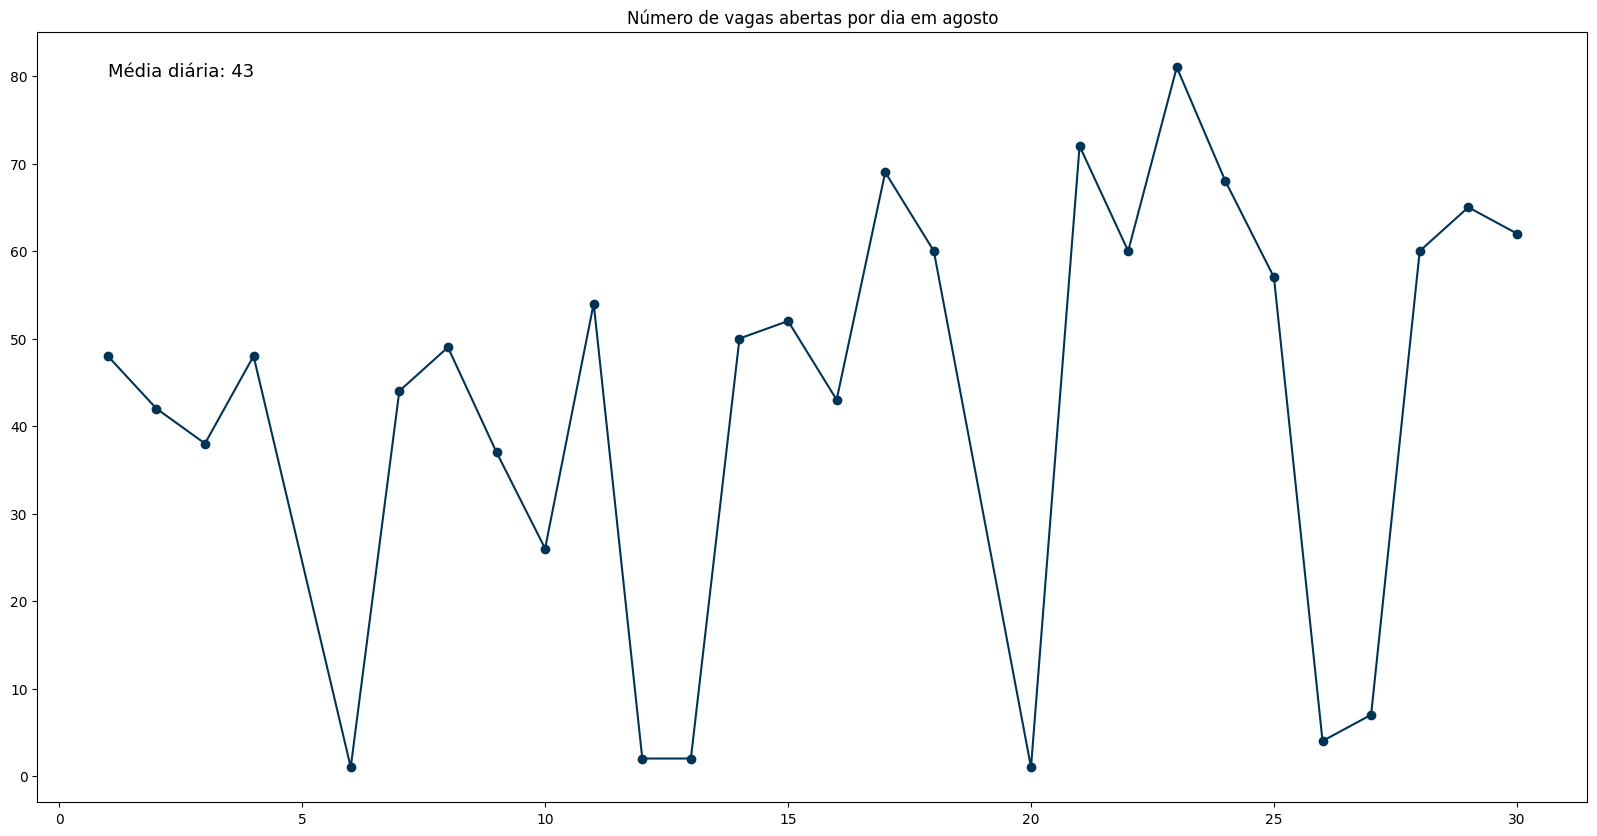

In [66]:
# Número de vagas publicadas por dia em agosto
plt.figure(figsize=(20, 10))
n_vagas_dia = pd.DataFrame(dados[dados['Mes_Publicação']==8].groupby('Dia_Publicação').nunique())
plt.plot(n_vagas_dia.index, n_vagas_dia['Vaga'], marker='o', linestyle='-', color='#003355')
plt.title("Número de vagas abertas por dia em agosto")
plt.text(1, 80, f"Média diária: {n_vagas_dia['Vaga'].mean():.0f}", fontsize = 13)
plt.savefig('vagas_dia_ago.jpeg')

Esse gráfico fiz como curiosidade do número de vagas por dia. Um fator a observar é a queda de valores em alguns pontos, que são dias de finais de semana.

* **Alguns dias foram publicadss mais 70 vagas**
* **O número de vagas médias publicadas por dia é aproximadamente 43**

0 77
1 38


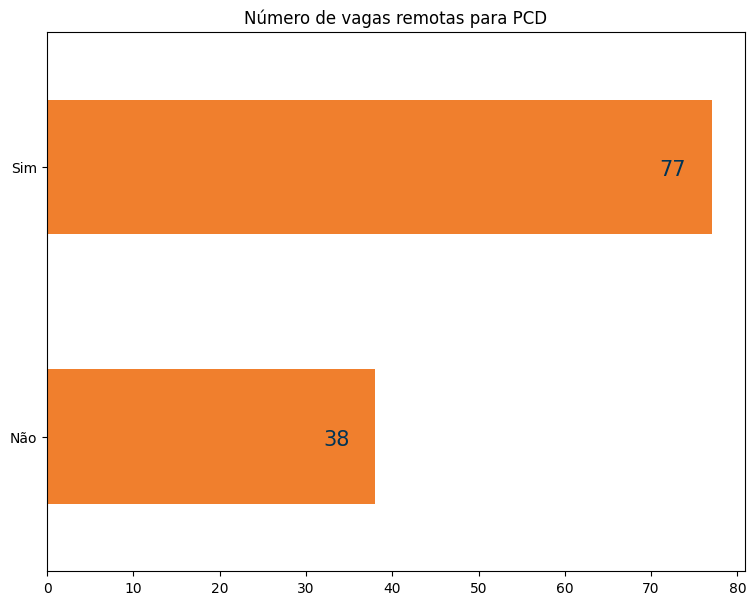

In [99]:
plt.figure(figsize=(9, 7))
valores_pcd_remoto = dados[dados['Modelo'] == 'Remoto']['Possui p/ PCD?'].value_counts()
grafico_pcd_remot = valores_pcd_remoto.plot(kind='barh', color = "#F07F2D")
plt.gca().invert_yaxis()
for i, valor in enumerate(valores_pcd_remoto.values):
    print(i, valor)
    grafico_pcd_remot.text(valor - 6, i+0.01, str(valor), va='center', color='#003355', fontsize = 15)
plt.title('Número de vagas remotas para PCD')
valores_pcd_remoto[0]/valores_pcd_remoto.sum() # proporção de vagas remotas que têm vagas para PCDs
plt.savefig('vagas_remotas_pcd.jpeg')

Entre as vagas remotas, **67% (77 vagas) possuem vagas para pessoas com deficiência e 33% não.**

0 1686
1 742


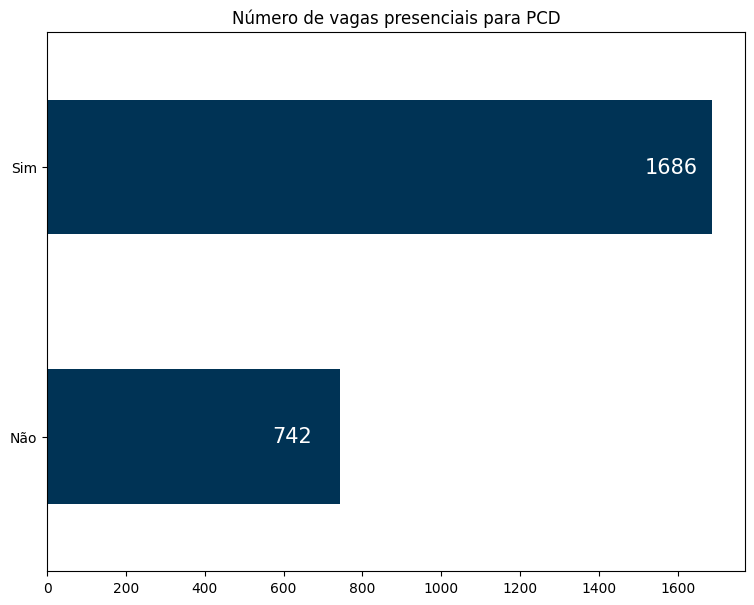

In [76]:
plt.figure(figsize=(9, 7))
valores_pcd_presencial = dados[dados['Modelo'] == 'Presencial']['Possui p/ PCD?'].value_counts()
grafico_pcd_pres = valores_pcd_presencial.plot(kind='barh', color = '#003355')
plt.gca().invert_yaxis()
for i, valor in enumerate(valores_pcd_presencial.values):
    print(i, valor)
    grafico_pcd_pres.text(valor - 170, i, str(valor), va='center', color='white', fontsize = 15)
plt.title('Número de vagas presenciais para PCD')
valores_pcd_presencial[0]/valores_pcd_presencial.sum() # proporção de vagas presenciais que têm vagas para PCDs
plt.savefig('vagas_presenciais_pcd.jpeg')

Entre as vagas presenciais, a proporção mantém-se parecida: **69% das vagas presenciais possuem vagas para PCDs**, enquanto 31% não.

0 1238
1 527
2 222
3 187
4 85
5 58
6 41
7 29


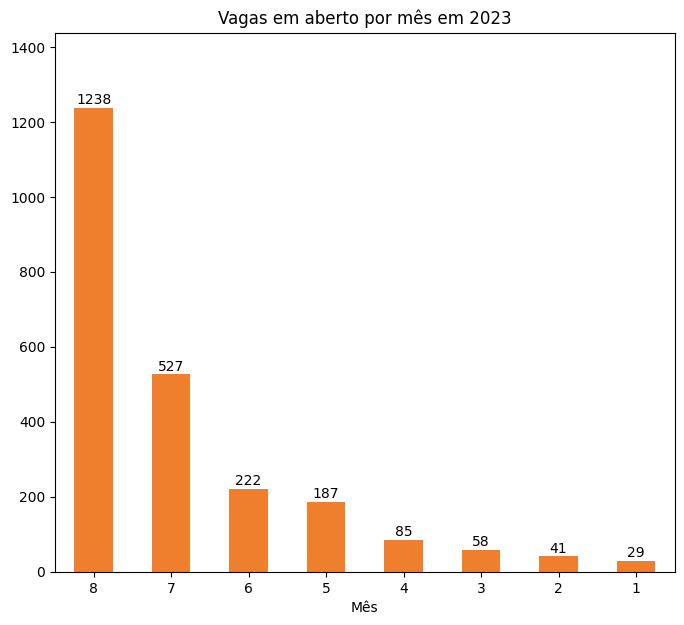

In [77]:
plt.figure(figsize=(8, 7))
vagas_mes_2023 = dados[dados['Ano_Publicação'] == 2023]['Mes_Publicação'].value_counts()
grafico_mes_2023 = vagas_mes_2023.plot(kind = 'bar', color = '#F07F2D')
plt.xticks(rotation=0)
plt.ylim(0, max(vagas_mes_2023)  + 200)
for i, valor in enumerate(vagas_mes_2023.values):
    print(i, valor)
    grafico_mes_2023.text(i, valor + 10, str(valor), ha='center', color='black', fontsize = 10)
plt.title('Vagas em aberto por mês em 2023')
plt.xlabel('Mês')
plt.savefig('vagas_mes_2023.jpeg')

O gráfico acima apresenta o número de vagas em aberto, por mês, no ano de  2023. Note que são vagas abertas no dia 30 de agosto de 2023, ou seja,
não é o número de vagas total que foram abertas em um determinado mês, mas
sim que permanecem até o dia citado.

Os próximos dois gráficos são gráficos de barras empilhados em proporções por:  
* **Modalidade de trabalho (presencial/remoto)**
* **Vaga PCD (sim/não)**

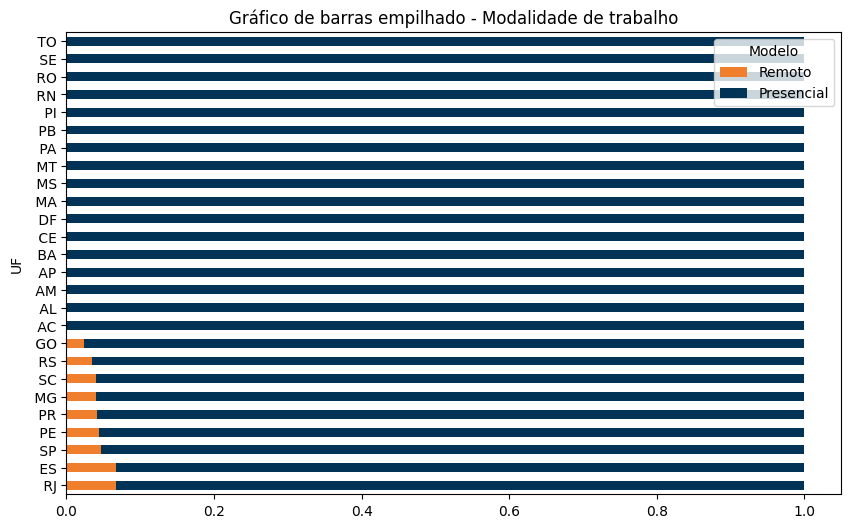

In [107]:
proporcoes = (
    dados.groupby(['UF', 'Modelo']).size().unstack() / np.array(dados.groupby('UF').size())[:, None]
)
proporcoes = proporcoes[['Remoto', 'Presencial']]
estados_ordenados = proporcoes['Remoto'].sort_values(ascending=False).index

grafico = proporcoes.loc[estados_ordenados].plot(kind='barh', stacked=True, figsize=(10, 6), color=['#F07F2D', '#003355'])
grafico.set_title("Gráfico de barras empilhado - Modalidade de trabalho")


plt.savefig('modalidade_uf.jpeg')


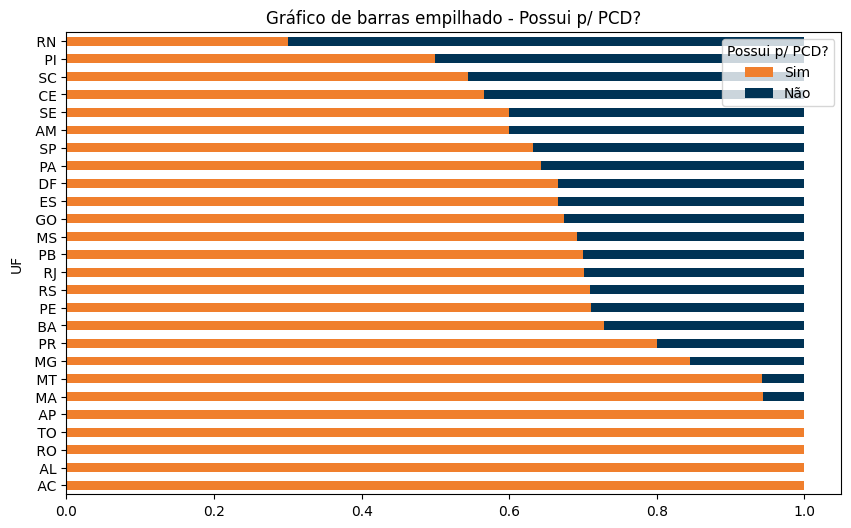

In [105]:
proporcoes_pcd_uf = (
    dados.groupby(['UF', 'Possui p/ PCD?']).size().unstack() /
    np.array(dados.groupby('UF').size())[:, None]  # Convertendo para numpy array
)

proporcoes_pcd_uf = proporcoes_pcd_uf[['Sim', 'Não']]
estados_pcd = proporcoes_pcd_uf['Sim'].sort_values(ascending=False).index

grafico = proporcoes_pcd_uf.loc[estados_pcd].plot(kind='barh', stacked=True, figsize=(10, 6), color=['#F07F2D', '#003355'])
grafico.set_title("Gráfico de barras empilhado - Possui p/ PCD?")
plt.savefig('pcd_uf.jpeg')



O próximo, e último gráfico, traz um dado interessante: Apesar do termo "estágio" ser a pesquisa realizada no buscador, **cerca de 20% das vagas apresentadas, apesar de estágio no nome, foram classificadas pelos empregadores por outro tipo: efetivo, banco de talentos, entre outos.**

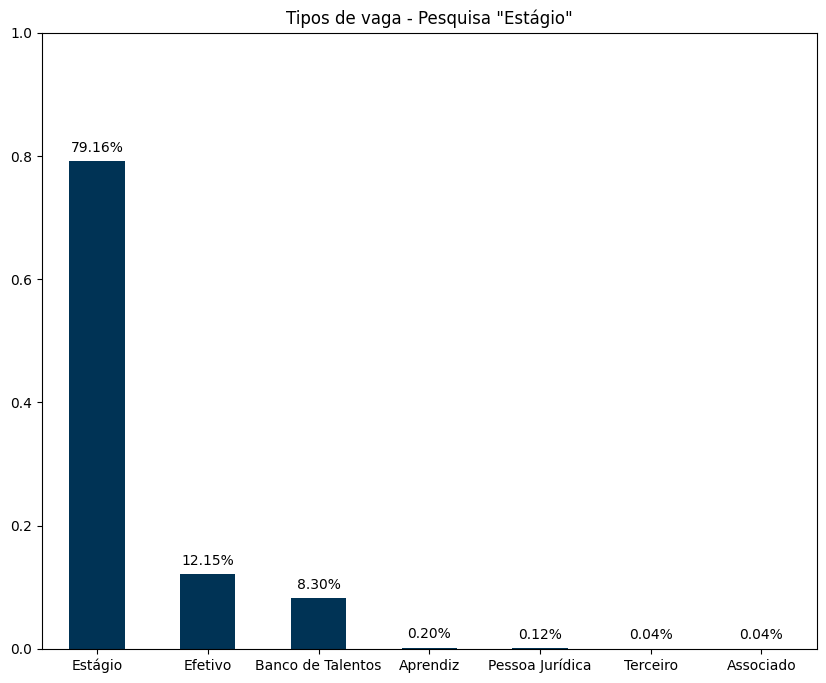

In [80]:
plt.figure(figsize=(10, 8))
grafico = prop_tipo.plot(kind='bar', color = '#003355')

for bar in grafico.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.2%}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.title('Tipos de vaga - Pesquisa "Estágio"')
dados['Possui p/ PCD?'].value_counts()
plt.savefig('tipo_vaga_prop.jpeg')

## Outras análises possíveis
* Cidades com mais vagas, por tipo, modalidade e acessibilidade;
* Número de vagas em aberto por ano;
* No caso de possuir os dados completos, inclusive vagas já fechadas: tempo para fechar as vagas por tipo, modalidade, acessibilidade, UF e mês, análise de série temporal das vagas, proporção de vagas fechadas e abertas em determinado mês;
* Ideia: utilizar API para coleta dos dados;
* Ideia: modelo preditivo de número de vagas por tipo, modalidade ou acessibilidade.